In [2]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 split
from sklearn.model_selection import train_test_split

# 회귀분석
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from statsmodels.formula.api import ols
# from sklearn.feature_selection import RFE

# from sklearn.tree import DecisionTreeRegressor
# # 앙상블 모델
# from sklearn.ensemble import GradientBoostingRegressor as GBR
# from sklearn.ensemble import RandomForestRegressor as RFR

# from sklearn.model_selection import GridSearchCV

# # 평가함수
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

# 폰트 설정
matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

## 1) 데이터 구성

In [3]:
df_raw = pd.read_csv("Data/체질검사.csv", encoding="cp949", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [102]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [4]:
df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1)
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
df_raw_x.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,44.885,178.924,70.149,37.992,100.824,92.556,99.905,59.406,38.590,23.102,32.273,28.664,18.230
std,12.602,29.389,3.663,2.431,8.430,10.783,7.164,5.250,2.412,1.695,3.021,2.021,0.934
min,22.000,118.500,29.500,31.100,79.300,69.400,85.000,47.200,33.000,19.100,24.800,21.000,15.800
25%,35.750,159.000,68.250,36.400,94.350,84.575,95.500,56.000,36.975,22.000,30.200,27.300,17.600
50%,43.000,176.500,70.000,38.000,99.650,90.950,99.300,59.000,38.500,22.800,32.050,28.700,18.300
75%,54.000,197.000,72.250,39.425,105.375,99.325,103.525,62.350,39.925,24.000,34.325,30.000,18.800
max,81.000,363.150,77.750,51.200,136.200,148.100,147.700,87.300,49.100,33.900,45.000,34.900,21.400


- 데이터의 max치가 크게는 2500까지 있고, 작게는 소수 점까지 있어 비교가 쉽지 않아보이므로 scailing을 진행

In [6]:
# 변수 이름 저장
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

# 변환된 데이터 및 형태 확인
print("Scaled Data: \n {}".format(nd_scaled[:5].round(3)))
print("Shape: \n {}".format(nd_scaled.shape))

Scaled Data: 
 [[ 0.089  6.281  0.575  5.444  4.205  5.161  6.685  5.324  4.366  3.841
   4.221  0.167  3.403]
 [-1.422 -0.372  0.301  0.044 -0.93  -1.25  -0.756 -0.402 -0.993  0.826
  -1.086  0.663  0.612]
 [ 1.917 -0.04  -0.451  0.292  0.14   0.227 -0.224 -0.841 -0.121 -0.77
  -0.489 -1.47   0.612]
 [ 0.963 -1.063 -1.203 -1.151 -0.146 -0.572 -1.371 -1.223 -1.492 -1.066
  -0.19  -0.676 -1.427]
 [ 0.486  1.366 -1.682  1.322  2.255  2.745  1.804  0.591 -0.702  0.294
   0.805  0.216  0.183]]
Shape: 
 (252, 13)


In [7]:
# StandScale한 값 데이터프레임으로 변환
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [8]:
# Scale 변환 데이터 요약 통계량

df_scaled.describe().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
count,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000,252.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-1.820,-2.060,-11.120,-2.841,-2.558,-2.152,-2.085,-2.330,-2.323,-2.366,-2.479,-3.800,-2.608
25%,-0.726,-0.679,-0.519,-0.656,-0.769,-0.742,-0.616,-0.650,-0.671,-0.652,-0.688,-0.676,-0.676
50%,-0.150,-0.083,-0.041,0.003,-0.140,-0.149,-0.085,-0.077,-0.038,-0.179,-0.074,0.018,0.075
75%,0.725,0.616,0.575,0.591,0.541,0.629,0.506,0.562,0.554,0.531,0.680,0.663,0.612
max,2.872,6.281,2.079,5.444,4.205,5.161,6.685,5.324,4.366,6.383,4.221,3.092,3.403


## 4) 주성분 분석
- 변수가 30개이므로, 주성분1~주성분30 생성 및 저장

In [10]:
pca = PCA(n_components=13)
nd_pca = pca.fit_transform(df_scaled)

# 생성된 주성분 점수 확인
print("PCA Data: \n {}".format(nd_pca[:5].round(3)))
print("Shape: \n {}".format(nd_pca.shape))

PCA Data: 
 [[ 1.5141e+01  7.4900e-01  1.7300e+00  2.9760e+00 -1.2010e+00  1.9160e+00
  -5.6500e-01  6.4200e-01 -7.1700e-01  6.6700e-01  1.1180e+00 -3.7400e-01
  -4.0200e-01]
 [-1.2570e+00 -1.7980e+00 -6.0400e-01 -4.0600e-01  1.3330e+00  8.2200e-01
   1.7400e-01 -1.0180e+00  3.7000e-02  3.7700e-01 -8.8000e-02 -1.1500e-01
  -2.1900e-01]
 [-7.2700e-01  2.3190e+00 -8.9200e-01  6.8300e-01 -5.0300e-01  6.0000e-01
  -5.1600e-01 -1.0000e-02  4.8000e-02 -2.6400e-01  1.7600e-01 -7.7000e-02
  -1.3600e-01]
 [-3.2100e+00  1.4650e+00  4.5800e-01 -5.7600e-01  2.0000e-02 -1.7900e-01
   7.1700e-01  8.4300e-01  2.1800e-01 -2.5500e-01 -2.3900e-01 -1.0100e-01
  -1.2200e-01]
 [ 3.2470e+00  2.2930e+00  1.8280e+00 -2.3000e-02 -4.0700e-01  1.1470e+00
   1.7010e+00 -1.0100e-01  5.4000e-01  3.0500e-01  4.6800e-01  2.7500e-01
   9.0000e-02]]
Shape: 
 (252, 13)


### 주성분 점수 저장 및 해석

In [12]:
prin_column = ["Prin"+str(i) for i in range(1, 14)]
df_pca = pd.DataFrame(nd_pca, columns=prin_column)
df_pca.round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,15.141,0.749,1.730,2.976,-1.201,1.916,-0.565,0.642,-0.717,0.667,1.118,-0.374,-0.402
1,-1.257,-1.798,-0.604,-0.406,1.333,0.822,0.174,-1.018,0.037,0.377,-0.088,-0.115,-0.219
2,-0.727,2.319,-0.892,0.683,-0.503,0.600,-0.516,-0.010,0.048,-0.264,0.176,-0.077,-0.136
3,-3.210,1.465,0.458,-0.576,0.020,-0.179,0.717,0.843,0.218,-0.255,-0.239,-0.101,-0.122
4,3.247,2.293,1.828,-0.023,-0.407,1.147,1.701,-0.101,0.540,0.305,0.468,0.275,0.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,3.700,2.375,-1.802,0.407,0.775,0.025,-0.606,-0.634,0.585,-0.310,0.234,0.127,0.186
248,-0.006,0.105,0.050,-0.143,1.154,0.204,-0.170,0.330,0.403,-0.735,-0.537,0.123,-0.019
249,-1.357,0.007,2.061,0.546,-0.696,-0.146,-0.284,0.093,-0.267,-0.094,-0.469,0.138,0.164
250,-0.271,0.887,-0.759,-0.436,0.910,-0.288,-0.293,-0.127,0.367,-0.183,0.215,0.334,0.064


In [13]:
# 주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.tail().round(3)

### 해당 분석에서는 관측이 안되므로 필요가 없어 보인다.

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,...,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
247,2.315,0.974,-0.041,1.157,1.376,1.482,1.006,-0.020,1.500,0.885,...,0.407,0.775,0.025,-0.606,-0.634,0.585,-0.310,0.234,0.127,0.186
248,-0.150,-0.279,-0.725,-0.244,0.342,-0.265,-0.798,-0.173,0.170,0.590,...,-0.143,1.154,0.204,-0.170,0.330,0.403,-0.735,-0.537,0.123,-0.019
249,-0.786,-0.551,-1.135,-0.656,-0.205,0.023,-0.099,0.705,0.046,-0.829,...,0.546,-0.696,-0.146,-0.284,0.093,-0.267,-0.094,-0.469,0.138,0.164
250,0.884,-0.381,-0.451,-0.244,-0.264,0.041,-0.406,-0.765,0.087,0.058,...,-0.436,0.910,-0.288,-0.293,-0.127,0.367,-0.183,0.215,0.334,0.064
251,-0.229,-0.372,0.370,-0.615,-1.049,-0.265,0.153,0.552,-0.245,-0.474,...,0.390,-0.808,-0.664,-0.097,0.218,-0.557,0.880,0.046,0.045,0.021


### 고유값 확인 및 주성분 개수 결정

In [16]:
# 주성분 분석 통계량 저장: 주성분 번호, EigenValue, EigenValue ratio

df_pca_stat = pd.DataFrame()
df_pca_stat["PrinNo"] = [i for i in range(1,14)]
df_pca_stat["EigenValues"] = pca.explained_variance_
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)

# 중요한 것을 끄집어낼 때 20% 정도는 필요가 없는 것으로 판단해서 버려도 괜찮은 것으로 본다.

In [17]:
df_pca_stat.round(3)[:5]

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897


- 직접 주성분선택: 상관계수 기준(고유값>=1) 5개, 공분산 기준(고유값 누적비율 >= 0.8) 3개 (0.803포함)

### Scree Plot 확인 및 주성분 개수 결정

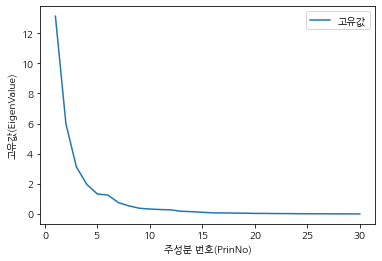

In [88]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValues"], label="고유값")

plt.ylabel("고유값(EigenValue)")
plt.xlabel("주성분 번호(PrinNo)")
plt.legend(loc="best")

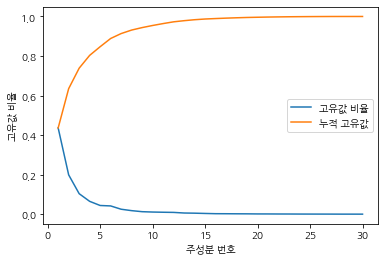

In [89]:
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["EigenValueRatio"], label="고유값 비율")
plt.plot(df_pca_stat["PrinNo"], df_pca_stat["CumEigenValueRatio"], label="누적 고유값")

plt.ylabel("고유값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

### 주성분 번호 "5" 설정

## 5) 고유벡터 확인 및 해석

In [90]:
# 주성분 분석 데이터의 변수 이름 저장
x_cols = pd.DataFrame({"Feature": df_raw_x.columns})

# 파이썬 PCA분석시 SVD(Singular value decomposition) 연산 방식의 차이 반영
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1,
                           columns=prin_column)], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,mean_radius,-0.214,0.238,0.026,0.026,-0.007,-0.068,0.156,-0.097,-0.196,...,0.166,0.074,-0.078,0.131,0.070,-0.082,0.168,-0.180,-0.218,0.706
1,mean_texture,-0.110,0.046,0.038,-0.604,0.042,0.101,-0.030,0.138,0.097,...,-0.251,0.109,-0.136,-0.183,-0.070,-0.017,0.040,-0.002,0.006,0.002
2,mean_perimeter,-0.225,0.218,0.024,0.029,-0.010,-0.068,0.147,-0.106,-0.182,...,0.113,0.072,-0.027,0.048,0.095,-0.072,0.168,-0.087,-0.376,-0.689
3,mean_area,-0.213,0.245,-0.002,0.040,-0.010,-0.035,0.082,-0.048,-0.229,...,-0.032,-0.035,0.137,0.060,-0.114,0.142,-0.543,0.259,0.438,-0.042
4,mean_smoothness,-0.151,-0.194,0.058,0.201,-0.037,0.474,0.074,-0.196,-0.012,...,0.076,0.107,0.058,-0.064,0.008,-0.057,-0.069,-0.009,0.003,-0.007
5,mean_compactness,-0.240,-0.163,0.046,0.053,-0.024,-0.040,-0.025,-0.136,0.011,...,-0.184,0.053,-0.350,-0.201,0.202,0.266,-0.169,0.008,0.050,0.051
6,mean_concavity,-0.261,-0.046,0.003,0.046,-0.060,-0.019,0.107,-0.057,0.024,...,-0.259,-0.314,0.112,0.046,0.039,-0.637,-0.129,-0.056,0.011,0.021
7,mean_concave_points,-0.260,0.039,0.035,0.086,-0.008,0.067,0.154,-0.191,-0.009,...,0.092,-0.325,0.099,0.065,-0.168,0.527,0.291,0.029,0.004,0.003
8,mean_symmetry,-0.147,-0.197,0.047,0.138,0.428,0.061,0.054,-0.219,0.176,...,0.100,-0.003,0.064,0.021,-0.024,-0.026,0.008,-0.007,0.009,-0.001
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080,-0.056,0.104,-0.290,-0.176,-0.104,...,0.116,0.181,0.092,0.247,-0.011,-0.079,0.125,0.008,-0.008,-0.003


- 1주성분은 전체적인 음의 상관성
- 2주성분 또한 1주성분과 비슷한 음이 상관성
- 3주성분은 texture_error와 smootheness_error의 음의 상관성
- 4주성분은  worst_texture와 mean_texture의 음의 상관성을 
- 5주성분으로 symmetry_error와 worst_symmetry의 음의 상관성 을 갖는다.

In [91]:
df_pca.corr().round(3)[:5]

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
Prin1,1.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0
Prin3,-0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
Prin4,0.0,-0.0,-0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prin5,-0.0,0.0,-0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0


## 6) 주성분 산포도 그리기

In [105]:
target = pd.DataFrame(df_raw_y,columns=["diagnosis"])
target

,diagnosis
0,음성
1,양성
2,음성
3,양성
4,양성
...,...
315,음성
316,음성
317,음성
318,음성


In [127]:
merged = pd.concat([target, df_scaled_pca], axis=1)
merged.tail()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
315,음성,1.026836,0.696569,1.002091,0.935884,0.115388,0.149662,0.749272,0.842967,0.441965,...,0.276399,0.214326,-0.090862,0.097209,0.132012,0.030356,-0.103970,-0.024059,-0.056874,-0.012532
316,음성,0.906513,1.439770,1.009845,0.828565,1.556311,0.977783,0.844915,1.918178,-0.851669,...,0.402164,-0.338584,-0.554356,0.088626,-0.292044,-0.126926,-0.189966,0.095734,0.010526,0.002299
317,음성,2.283544,-0.029740,2.448075,2.435795,3.187013,2.861626,3.597318,3.221391,2.868897,...,-0.391923,-0.335456,0.573959,0.442660,-0.022420,0.084126,-0.028294,-0.083102,0.036978,-0.000379
318,음성,0.925230,1.080235,1.137773,0.805568,-0.137652,2.145555,0.996055,1.075769,1.928734,...,0.510771,-0.002609,-0.409990,0.275980,-0.001399,-0.130352,-0.115218,0.180062,-0.032861,0.014489
319,양성,-1.056090,0.308078,-1.098268,-0.970563,-0.912939,-1.288432,-1.246604,-1.339856,-1.358191,...,0.068746,0.039446,0.050318,-0.023967,0.011569,0.048007,0.049644,-0.010732,0.018459,0.002194


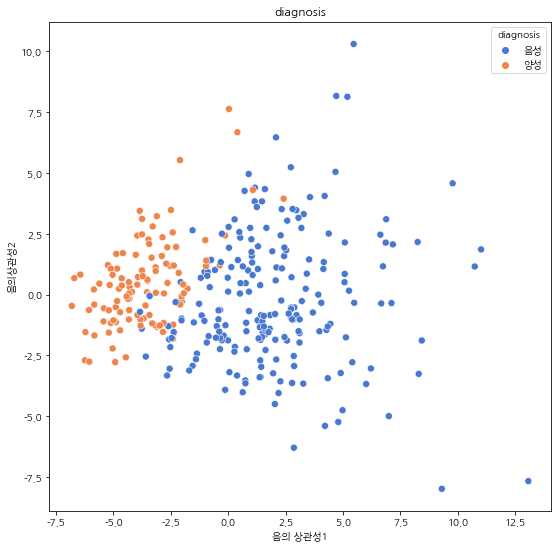

In [145]:
# 1대 2주성분
plt.figure(figsize=(9, 9))
sns.scatterplot(x= 'Prin1',y = "Prin2", hue='diagnosis', 
                s=50, data=merged)
plt.xlabel("음의 상관성1")
plt.ylabel("음의 상관성2")
plt.title('diagnosis')
plt.show()

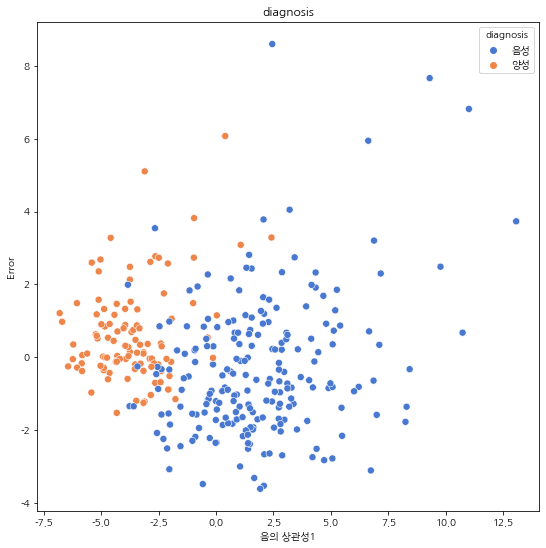

In [146]:
# 1대 3주성분
plt.figure(figsize=(9, 9))
sns.scatterplot(x= 'Prin1',y = "Prin3", hue='diagnosis', 
                s=50, data=merged)
plt.xlabel("음의 상관성1")
plt.ylabel("Error")
plt.title('diagnosis')
plt.show()

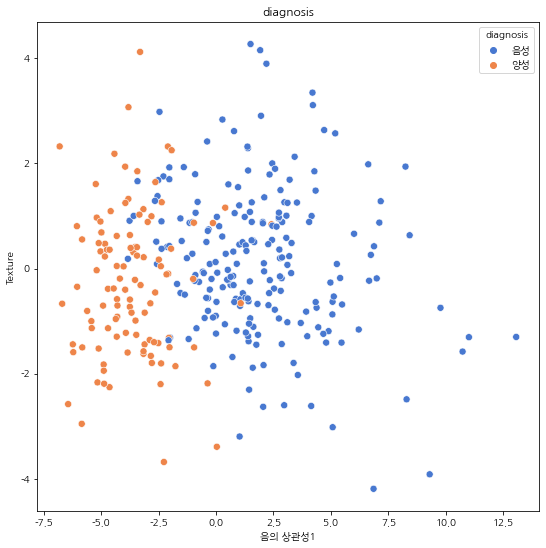

In [147]:
# 1대 4주성분
plt.figure(figsize=(9, 9))
sns.scatterplot(x= 'Prin1',y = "Prin4", hue='diagnosis', 
                s=50, data=merged)
plt.title('diagnosis')
plt.xlabel("음의 상관성1")
plt.ylabel("Texture")
plt.show()

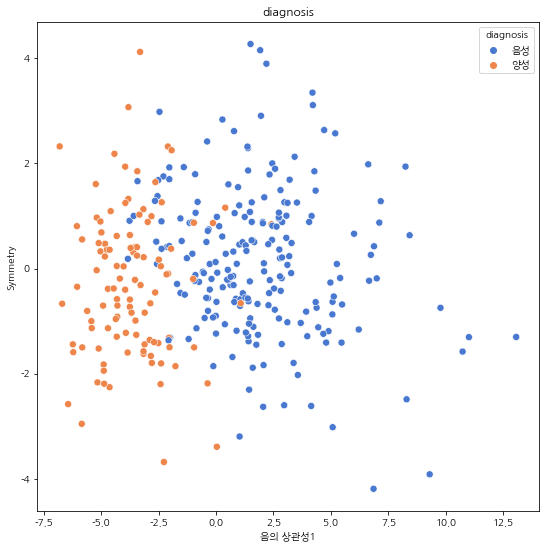

In [148]:
# 1대 5주성분
plt.figure(figsize=(9, 9))
sns.scatterplot(x= 'Prin1',y = "Prin4", hue='diagnosis', 
                s=50, data=merged)
plt.xlabel("음의 상관성1")
plt.ylabel("Symmetry")
plt.title('diagnosis')
plt.show()

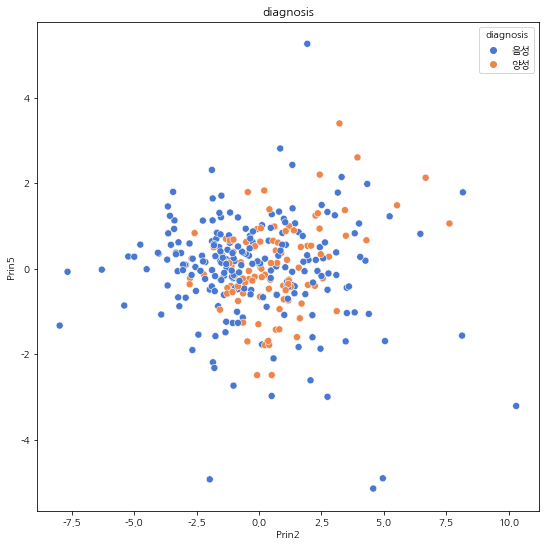

In [142]:
# 2대 3주성분
plt.figure(figsize=(9, 9))
sns.scatterplot(x= 'Prin2',y = "Prin5", hue='diagnosis', 
                s=50, data=merged)
plt.title('diagnosis')
plt.show()

## 결과 분석
- 주성분 분석으로 유방암을 표시해봤다. 

- 1주성분은 전체적인 음의 상관성
- 2주성분 또한 1주성분과 비슷한 음이 상관성
- 3주성분은 texture_error와 smootheness_error의 음의 상관성
- 4주성분은  worst_texture와 mean_texture의 음의 상관성을 
- 5주성분으로 symmetry_error와 worst_symmetry의 음의 상관성 을 갖는다.

### 네이밍
- 1주성분과 2주성분은 상관관계가 유독 강한 변수를 발견할 수 없었다. 다만 모든 변수에서 음의 상관관계가 강하게 나타났으므로 minus column1, 2
- 3주성분은 texture_error와 smootheness_error의 음의 상관성이 있었으므로, error column
    - (세포)질감과 매끄러움 표준오차
- 4주성분은 worst_texture와 mean_texture의 음의 상관성이 있었으므로 , texture column
    - (세포) 최대질감과 평균질감의 표준오차
- 5주성분은  symmetry_error와 worst_symmetry의 음의 상관성이 있었으므로, symmetry column
    - (세포) 대칭의 표준오차와 최대 대칭


이렇게 각 5개의 주성분의 column을 네이밍했다.

### 결론
- 1주성분과 다른 주성분의 scatter plot 비교에서 보통 분류가 가장 잘 나타나는 것으로 보였다.
- 특히 1주성분과의 scatter plot 비교를 보면 1주성분이 -2.5를 기준으로 음성과 양성이 분류되는 모습을 보였다.


- 따라서 유방암의 음성과 양성을 나누는 기준을 1주성분의 -2.5로 두는 방법을 제시해본다.